# A5
## Jace Kohl

In [17]:
!pip install plotly
!pip install ipywidgets
!pip install munch

In [18]:
import numpy as np
import pandas as pd
from munch import Munch
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact

kB = 1.381e-23 # J/K
h = 6.626e-34 # Js
R = 8.314 # J/mol-K
R_kJ = R / 1000 # kJ/mol-K
 
amu = 1.6605e-27 # 1 amu = 1.6605e-27 kg

In [19]:
def polymer4(E, T, R=R_kJ):
   
    wC = 1
    wO = 4*np.exp(-E/(R*T))

    q = wC + wO
    
    pC = wC/q
    pO = wO/q
    K = pO/pC
    avgE = (E*wO)/q

    return Munch(locals()) # locals is a dictionary containing all variables defined in the function

In [20]:
atom_masses = {'H': 1.008, 'He': 4.003, 'C': 12.011, 'N': 14.007, 'O': 15.999}
atom_masses

{'H': 1.008, 'He': 4.003, 'C': 12.011, 'N': 14.007, 'O': 15.999}

In [21]:
atom_masses['H']

1.008

In [22]:
am = Munch(atom_masses)

In [23]:
am.H*2 + am.O

18.015

In [24]:
polymer4(5, 273)

Munch({'E': 5, 'T': 273, 'R': 0.008314, 'wC': 1, 'wO': 0.44192345318578813, 'q': 1.441923453185788, 'pC': 0.6935180905689539, 'pO': 0.30648190943104625, 'K': 0.44192345318578813, 'avgE': 1.5324095471552313})

In [25]:
temps = np.linspace(1, 5000, num=500)

outs = polymer4 (5, temps)

df = pd.DataFrame(outs)

df['temp'] = df ['T']
df

,E,T,R,wC,wO,q,pC,pO,K,avgE,temp
0,5,1.000000,0.008314,1,2.626801e-261,1.000000,1.000000,2.626801e-261,2.626801e-261,1.313400e-260,1.000000
1,5,11.018036,0.008314,1,7.889546e-24,1.000000,1.000000,7.889546e-24,7.889546e-24,3.944773e-23,11.018036
2,5,21.036072,0.008314,1,1.535037e-12,1.000000,1.000000,1.535037e-12,1.535037e-12,7.675186e-12,21.036072
3,5,31.054108,0.008314,1,1.554153e-08,1.000000,1.000000,1.554153e-08,1.554153e-08,7.770765e-08,31.054108
4,5,41.072144,0.008314,1,1.749611e-06,1.000002,0.999998,1.749608e-06,1.749611e-06,8.748039e-06,41.072144
...,...,...,...,...,...,...,...,...,...,...,...
495,5,4959.927856,0.008314,1,3.543247e+00,4.543247,0.220107,7.798931e-01,3.543247e+00,3.899466e+00,4959.927856
496,5,4969.945892,0.008314,1,3.544113e+00,4.544113,0.220065,7.799351e-01,3.544113e+00,3.899675e+00,4969.945892
497,5,4979.963928,0.008314,1,3.544976e+00,4.544976,0.220023,7.799768e-01,3.544976e+00,3.899884e+00,4979.963928
498,5,4989.981964,0.008314,1,3.545836e+00,4.545836,0.219982,7.800184e-01,3.545836e+00,3.900092e+00,4989.981964


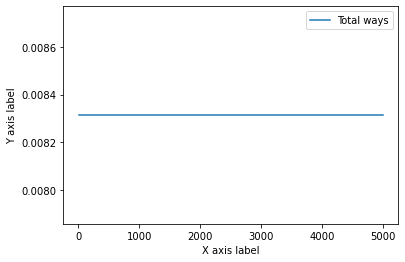

In [26]:
plt.plot(df.temp, df.R, label="Total ways")

plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.legend() # Show the legend

In [27]:
px.line(df, x='K',
        # Try switching the y axis list to plot the right columns
        y=['T'],
        # Plotly labels are changed in a dictionary
        labels={'value': "Temperature (K)", # value is the default name given to the y-axis when multiple things are plotted
                'T': "Equilibium constant (K) "
               }
       )

As the temperature of the systems increased, so did the equailibtrium constant. There will be more product formation (higher population in open energy levels than collapsed. K = [open]/[collapsed]. The graph is an exponetial function, nonlinear, slope increasing with temperature.   

In [28]:
temps = np.linspace(1, 2500, num=500)

outs = polymer4 (5, temps)

df = pd.DataFrame(outs)

df['temp'] = df ['T']
df

,E,T,R,wC,wO,q,pC,pO,K,avgE,temp
0,5,1.000000,0.008314,1,2.626801e-261,1.000000,1.000000,2.626801e-261,2.626801e-261,1.313400e-260,1.000000
1,5,6.008016,0.008314,1,1.348033e-43,1.000000,1.000000,1.348033e-43,1.348033e-43,6.740164e-43,6.008016
2,5,11.016032,0.008314,1,7.811594e-24,1.000000,1.000000,7.811594e-24,7.811594e-24,3.905797e-23,11.016032
3,5,16.024048,0.008314,1,2.007445e-16,1.000000,1.000000,2.007445e-16,2.007445e-16,1.003722e-15,16.024048
4,5,21.032064,0.008314,1,1.526697e-12,1.000000,1.000000,1.526697e-12,1.526697e-12,7.633484e-12,21.032064
...,...,...,...,...,...,...,...,...,...,...,...
495,5,2479.967936,0.008314,1,3.138651e+00,4.138651,0.241625,7.583754e-01,3.138651e+00,3.791877e+00,2479.967936
496,5,2484.975952,0.008314,1,3.140185e+00,4.140185,0.241535,7.584649e-01,3.140185e+00,3.792325e+00,2484.975952
497,5,2489.983968,0.008314,1,3.141714e+00,4.141714,0.241446,7.585541e-01,3.141714e+00,3.792770e+00,2489.983968
498,5,2494.991984,0.008314,1,3.143238e+00,4.143238,0.241357,7.586429e-01,3.143238e+00,3.793214e+00,2494.991984


In [29]:
# If you give plotly a dataframe,
# just use the names of the columns to tell plotly what should be on each axis
# If you give a list, it will plot multiple things
px.line(df, x='T',
        # Try switching the y axis list to plot the right columns
        y=['q','wf', 'ws'],
        # Plotly labels are changed in a dictionary
        labels={'value': "Y axis label", # value is the default name given to the y-axis when multiple things are plotted
                'T': "Temperature (K)"
               }
       )

ValueError: All arguments should have the same length. The length of argument `y` is 3, whereas the length of  previously-processed arguments ['T'] is 500

In [30]:
The graph is similar to the 5000 K graph, except the equilibrium constant range is smaller, just barely passing 3. THe temperature is half, therefore we would see a less particles in the open energy level compared to the 5000 K graph. The lower temp, has more particles in the system in the ground state/colllapsed state. 

SyntaxError: invalid syntax (999282148.py, line 1)

In [14]:
def polymer4(E, T, R=R_kJ):
   
    ws=5*np.exp(-E/(R*T))
    wf = 2

    q = ws + wf
    k= ws/wf

    return Munch(locals()) # locals is a dictionary containing all variables defined in the function

In [15]:
temps = np.linspace(270, 370, num =370)
outputs = polymer4 (4.81e-21, temps)
df = pd.DataFrame(outputs)
df['temps']= df['T']
df

,E,T,R,ws,wf,q,k,temps
0,4.810000e-21,270.000000,0.008314,5.0,2,7.0,2.5,270.000000
1,4.810000e-21,270.271003,0.008314,5.0,2,7.0,2.5,270.271003
2,4.810000e-21,270.542005,0.008314,5.0,2,7.0,2.5,270.542005
3,4.810000e-21,270.813008,0.008314,5.0,2,7.0,2.5,270.813008
4,4.810000e-21,271.084011,0.008314,5.0,2,7.0,2.5,271.084011
...,...,...,...,...,...,...,...,...
365,4.810000e-21,368.915989,0.008314,5.0,2,7.0,2.5,368.915989
366,4.810000e-21,369.186992,0.008314,5.0,2,7.0,2.5,369.186992
367,4.810000e-21,369.457995,0.008314,5.0,2,7.0,2.5,369.457995
368,4.810000e-21,369.728997,0.008314,5.0,2,7.0,2.5,369.728997
